# **Analysis for clusters / templates and waveforms, channels, shanks**

## This analysis script is well suited to analyse where the electrodes (silicon probes) are located that detected specific spikes.
**It uses the output of kilosort (cluster assignment) and also takes care of the post-processing made by phy (split/merge templates to clusters).**

load modules

In [1]:
%load_ext autoreload

%autoreload 2
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from spikeA.Session import *
from spikeA.Spike_train_loader import Spike_train_loader
from spikeA.Cell_group import Cell_group
from spikeA.Animal_pose import Animal_pose
from spikeA.Session import Session

set session name

In [2]:
#name="pk1330-08112021-0101"
#name="pk1330-10112021-0101"
#name="pk1330-16112021-0101"

#name="pk1330-12112021-0101"
#name="pk1331-23112021-0101"
#name="pk1331-23112021-0101_B"

#name="pk1331-24112021-0101"
#name="pk1347-24112021-0101"

#name="pk1331-29112021-0101"
#name="pk1347-01122021-0101"

#name="pk1658-06122021-0102"

#name="pk1331-29112021-0101" # HD cells
#name="pk1658-10122021-0101"

#name="pk1613-12012022-0101"
#name="pk1613-13012022-0101"

#name="pk1615-14012022-0101"

#name="pk1615-15012022-0101"
#name="pk1615-16012022-0101"
#name="pk1615-17012022-0101"
#name="pk1615-18012022-0101_A"

#name="pk1615-18012022-0103"
#name="pk1615-19012022-0105" ## remapping ! (black-white-black)
#name="pk1615-19012022-0102"

#name="pk1615-20012022-0101_B"
#name="pk3865-20012022-0101_B"

#name="pk3865-21012022-0101"

#name="pk1615-21012022-0109"  # five different environments in two different rooms
#name="pk3865-24012022-0109"  # five different environments in two different rooms
#name="pk3865-25012022-0105" # black-white-black in 55b
#name="pk3865-26012022-0101"
#name="pk3865-27012022-0109" # five env + good coverage, good MEC signal, ADN?
#name="pk3864-28012022-0101" # first trial with pk3864
#name="pk3864-29012022-0101" # 
#name="pk3864-30012022-0101" # 
#name="pk3865-31012022-0101"
#name="pk3864-31012022-0109" # first 5 OF trials for pk3864

#name="pk3865-01022022-0101"
#name="pk3865-02022022-0101"

# name="pk3864-04022022-0109" # 

# name="pk3864-05022022-0109" # 
# name="pk3864-07022022-0109" # 
# name="pk3864-09022022-0109" # 

# name="pk3864-10022022-0101"
# name="pk3864-11022022-0101"
# name="pk3864-14022022-0109"
# name="pk3864-15022022-0109"
# name="pk3864-16022022-0101"
# name="pk3855-21022022-0101"
# name="pk3855-24022022-0101"
# name="pk3864-24022022-0101"
# name="pk3864-02032022-0109"

# name="pk3864-10032022-0101"
name="pk3864-21032022-0101" # check

name="pk3192-05052022-0101"

Check the path

In [3]:
import os

basedir = "/adata/electro"
subject, session = name.split("-",1)
path = basedir+"/"+subject+"/"+name+"/"

fname = name.split("_")[0]

print("Path:", path)
print("Mouse:", subject) # directory = mouse subject name
print("Session:", session)
print("Name:", name, ",", fname)
print("")
print("Path:", "OK" if os.path.isdir(path) else "invalid")

Path: /adata/electro/pk3192/pk3192-05052022-0101/
Mouse: pk3192
Session: 05052022-0101
Name: pk3192-05052022-0101 , pk3192-05052022-0101

Path: OK


## Get a Session object

Check the files

In [4]:
ses = Kilosort_session(name=fname, path=path)
ses.load_parameters_from_files(ignore_params=True)  # ignore_params if kilosort has not been executed so far
print(ses)

<class 'spikeA.Session.Kilosort_session'>
name = pk3192-05052022-0101
path = /adata/electro/pk3192/pk3192-05052022-0101
subject = pk3192
session_dat_time = 2022-05-05 01:01:00
fileBase = /adata/electro/pk3192/pk3192-05052022-0101/pk3192-05052022-0101
file_names = {'par': '/adata/electro/pk3192/pk3192-05052022-0101/pk3192-05052022-0101.par', 'desen': '/adata/electro/pk3192/pk3192-05052022-0101/pk3192-05052022-0101.desen', 'desel': '/adata/electro/pk3192/pk3192-05052022-0101/pk3192-05052022-0101.desel', 'sampling_rate': '/adata/electro/pk3192/pk3192-05052022-0101/pk3192-05052022-0101.sampling_rate_dat', 'stimulation': '/adata/electro/pk3192/pk3192-05052022-0101/pk3192-05052022-0101.stimulation', 'px_per_cm': '/adata/electro/pk3192/pk3192-05052022-0101/pk3192-05052022-0101.px_per_cm', 'setup': '/adata/electro/pk3192/pk3192-05052022-0101/pk3192-05052022-0101.setup', 'environmentFamiliarity': '/adata/electro/pk3192/pk3192-05052022-0101/pk3192-05052022-0101.environmentFamiliarity', 'params':

## Load spikes

In [5]:
stl = Spike_train_loader()
stl.load_spike_train_kilosort(ses)
print("stl.clu_ids", ",", "len =", len(stl.clu_ids))
print(stl.clu_ids)
cg = Cell_group(stl)

stl.clu_ids , len = 17
[ 3  8 20 28 34 36 39 42 43 44 45 48 53 54 55 56 57]


In [6]:
# from tabulate import tabulate

print("Found", len(cg.neuron_list), "good clusters (neurons)")

# for i,(clu_id, spike_time) in enumerate(zip(stl.clu_ids, stl.spike_times)):
#     print("#",i,", id =",clu_id, ", spikes:",len(spike_time))
for i,n in enumerate(cg.neuron_list):
    #  n_spikes = len(n.spike_train.st)
    print("#",i,", id =",n.name, ", spikes:",n.spike_train.n_spikes(),", mean firing rate =",round(n.spike_train.mean_firing_rate(),2))

Found 17 good clusters (neurons)
# 0 , id = 3 , spikes: 126 , mean firing rate = 0.07
# 1 , id = 8 , spikes: 1701 , mean firing rate = 0.82
# 2 , id = 20 , spikes: 8393 , mean firing rate = 3.98
# 3 , id = 28 , spikes: 8199 , mean firing rate = 3.88
# 4 , id = 34 , spikes: 6740 , mean firing rate = 3.19
# 5 , id = 36 , spikes: 39484 , mean firing rate = 18.67
# 6 , id = 39 , spikes: 2826 , mean firing rate = 1.34
# 7 , id = 42 , spikes: 68774 , mean firing rate = 32.52
# 8 , id = 43 , spikes: 10062 , mean firing rate = 4.76
# 9 , id = 44 , spikes: 6467 , mean firing rate = 3.06
# 10 , id = 45 , spikes: 8355 , mean firing rate = 3.95
# 11 , id = 48 , spikes: 74275 , mean firing rate = 35.12
# 12 , id = 53 , spikes: 5352 , mean firing rate = 2.53
# 13 , id = 54 , spikes: 4103 , mean firing rate = 1.94
# 14 , id = 55 , spikes: 12216 , mean firing rate = 5.78
# 15 , id = 56 , spikes: 24351 , mean firing rate = 11.53
# 16 , id = 57 , spikes: 10322 , mean firing rate = 4.89


## Manual check (to check that it works correctly)

## Load the waveforms

Set the waveform and channel information from the session template file.

In [7]:
cg.set_info_from_session(ses, maxchannels=5)

Templates: 48 , timepoints: 82 , Channels: 32
Loaded templates-clusters-map, spikes: 384798 , clusters: 38
Init shanks: 4


For each cluster, print the active channels where the spikes were detected, and the corresponding brain area.

In [8]:
for n in cg.neuron_list:
    print(n.name, n.channels, n.brain_area, n.cluster_decomposed) 

3 [ 4 19 26 16  5] ['pos'] {3: 1.0}
8 [6 7 4 0 5] ['pos'] {8: 1.0}
20 [17 19 22 21 11] ['pos'] {20: 1.0}
28 [20 22 21 23 17] ['pos'] {28: 1.0}
34 [22 23 20 17 21] ['pos'] {34: 1.0}
36 [24 25 27 29 26] ['pos'] {36: 1.0}
39 [28 26 31 29 30] ['pos'] {39: 1.0}
42 [29 27 26 25 31] ['pos'] {42: 1.0}
43 [29 28 31 27 26] ['pos'] {43: 1.0}
44 [31 30 28 26 25] ['pos'] {44: 1.0}
45 [31 28 29 30 24] ['pos'] {45: 1.0}
48 [19 21 17 11 16] ['pos'] {25: 0.9325345001682935, 26: 0.0674654998317065}
53 [21 19 11 22 17] ['pos'] {30: 0.014387144992526158, 31: 0.020366218236173392, 32: 0.043535127055306426, 33: 0.8684603886397608, 47: 0.053251121076233185}
54 [25 27 24 26 15] ['pos'] {37: 0.04508895929807458, 38: 0.9549110407019255}
55 [3 0 2 5 6] ['pos'] {1: 0.9380320890635232, 46: 0.06196791093647675}
56 [5 2 4 6 7] ['pos'] {0: 0.08825099585232639, 4: 0.9000041066075315, 5: 0.011744897540142088}
57 [28 31 30 24 27] ['pos'] {40: 0.7203061422204999, 41: 0.2796938577795001}


In [9]:
unique, counts = np.unique([ '/'.join(n.brain_area) for n in cg.neuron_list ] , return_counts=True )

for u,c in zip(unique, counts):
    print(u,":",c)

pos : 17


In [10]:
ses.clusterids

array([ 2,  3,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 27, 28, 29, 34, 35, 36, 39, 42, 43, 44, 45, 48, 53,
       54, 55, 56, 57], dtype=int32)

Plot the waveforms for one arbitrary cluster (neuron) on the channels of its highest peak-to-peak amplitudes of waveform.

In [11]:
#cluster = 16 # choose any cluster
cluster = stl.clu_ids[0] # select the first good cluster = int(cg.neuron_list[0].name)
channels = ses.get_channels_from_cluster(cluster, 12)
print("The most significant channels for cluster", cluster,":")
print(channels)

The most significant channels for cluster 3 :
[ 4 19 26 16  5 20  2  7 31  1  8  0]


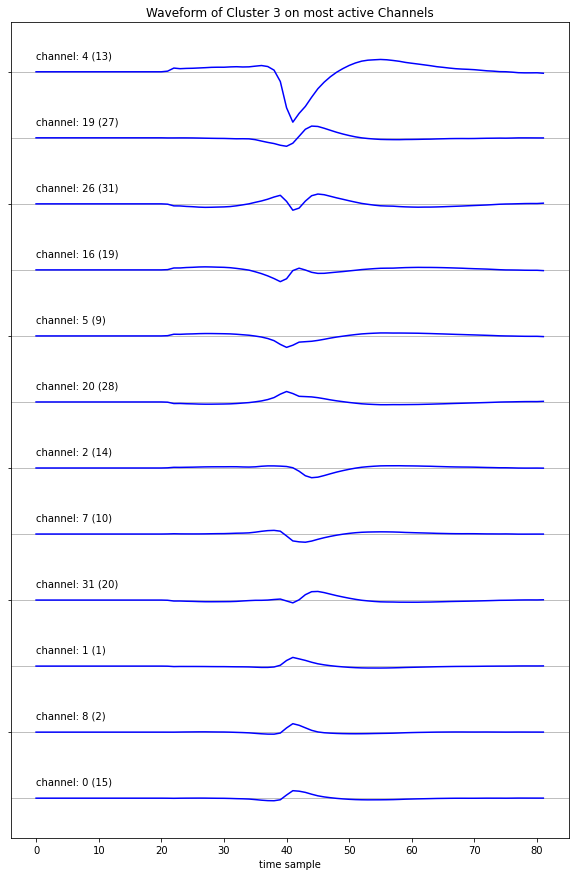

In [12]:
# plot on selected channels (in rows, using offset, so no y-axis)

plt.figure(figsize=(10,15))

for i,channel in enumerate(channels):
    
    channel_mapped, waveform = ses.get_waveform_from_cluster(cluster, channel) # get_waveform (of template / of cluster)
    
    plt.axhline( y = -i*.5 , color="grey" , lw=.5 )
    label = "channel: "+str(channel)+" ("+str(channel_mapped)+")"
    plt.plot( waveform -i*.5 , label=label , color="blue")
    plt.text( s= label , x=0, y=-i*.5 +.1 )
plt.xlabel("time sample")
#plt.legend()
ax = plt.gca()
ax.set(yticklabels=[])  
plt.title("Waveform of Cluster "+str(cluster)+" on most active Channels")
plt.show()

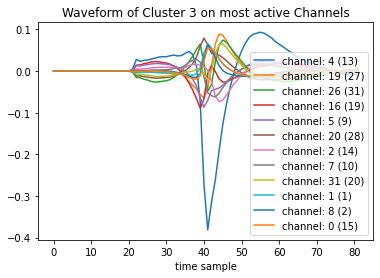

In [13]:
# plot on selected channels (in one plot, with meaningful y-axis)

for i,channel in enumerate(channels):
    
    channel_mapped, waveform = ses.get_waveform_from_cluster(cluster, channel) # get_waveform (of template / of cluster)
    
    # plt.axhline( y = -i*.5 , color="grey" , lw=.5 )
    label = "channel: "+str(channel)+" ("+str(channel_mapped)+")"
    plt.plot( waveform, label=label)
plt.xlabel("time sample")
plt.legend()
plt.title("Waveform of Cluster "+str(cluster)+" on most active Channels")
plt.show()

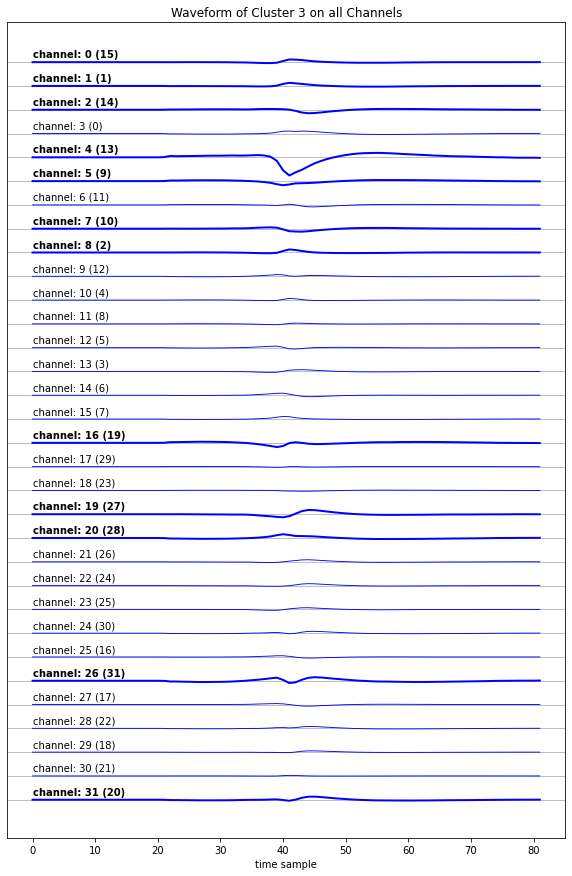

In [14]:
# plot waveform on all channels (and highlight the most active ones)

channels_all = range(ses.wv_channels)

plt.figure(figsize=(10,15))

for i,channel in enumerate(channels_all):
    channel_mapped, waveform = ses.get_waveform_from_cluster(cluster, channel)
    
    plot_style = [2.,'bold'] if channel in channels else [.9, 'normal']
    
    plt.axhline( y = -i*.5 , color="grey" , lw=.5 )
    label = "channel: "+str(channel)+" ("+str(channel_mapped)+")"
    plt.plot( waveform -i*.5 , label=label , color="blue" , lw=plot_style[0])
    plt.text( s= label , x=0, y=-i*.5 +.1 , weight=plot_style[1])
plt.xlabel("time sample")
#plt.legend()
ax = plt.gca()
ax.set(yticklabels=[])  # remove the tick labels
ax.set(ylabel=None)  # remove the y-axis label
ax.tick_params(left=False)  # remove the ticks

plt.title("Waveform of Cluster "+str(cluster)+" on all Channels")
plt.show()

## Channel configuration (position and shank mapping)

In [15]:
print("electrodes:", ses.desel)

electrodes: ['pos', 'pos', 'pos', 'pos']


channel: 0  ( 15 ), position: [0 1]
channel: 1  ( 1 ), position: [0 2]
channel: 2  ( 14 ), position: [0 3]
channel: 3  ( 0 ), position: [0 4]
channel: 4  ( 13 ), position: [0 5]
channel: 5  ( 9 ), position: [0 6]
channel: 6  ( 11 ), position: [0 7]
channel: 7  ( 10 ), position: [0 8]
channel: 8  ( 2 ), position: [1 9]
channel: 9  ( 12 ), position: [ 1 10]
channel: 10  ( 4 ), position: [ 1 11]
channel: 11  ( 8 ), position: [ 1 12]
channel: 12  ( 5 ), position: [ 1 13]
channel: 13  ( 3 ), position: [ 1 14]
channel: 14  ( 6 ), position: [ 1 15]
channel: 15  ( 7 ), position: [ 1 16]
channel: 16  ( 19 ), position: [ 2 17]
channel: 17  ( 29 ), position: [ 2 18]
channel: 18  ( 23 ), position: [ 2 19]
channel: 19  ( 27 ), position: [ 2 20]
channel: 20  ( 28 ), position: [ 2 21]
channel: 21  ( 26 ), position: [ 2 22]
channel: 22  ( 24 ), position: [ 2 23]
channel: 23  ( 25 ), position: [ 2 24]
channel: 24  ( 30 ), position: [ 3 25]
channel: 25  ( 16 ), position: [ 3 26]
channel: 26  ( 31 ), pos

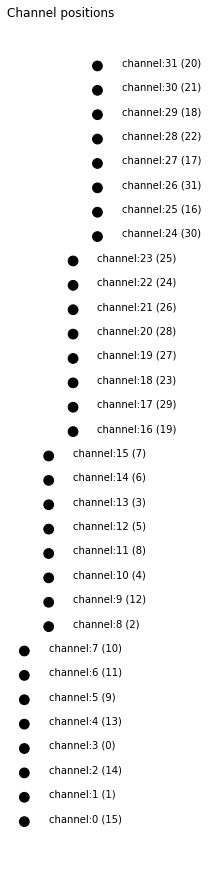

In [16]:
fig, ax = plt.subplots(figsize=(9,12), constrained_layout=True)

for channel, position in zip(range(ses.wv_channels), ses.channel_positions):
    print("channel:",channel," (",ses.channel_map[channel],"), position:",position)
        
    circle = plt.Circle((position[0], position[1]), 0.2, color="black")
    ax.add_patch(circle)
    
    plt.text(x=position[0]+1, y=position[1], s="channel:"+str(channel)+" ("+str(ses.channel_map[channel])+")")
    

ax.axis('off')
ax.axis('scaled') #this line fits your images to screen 
#ax.autoscale(enable=True)
plt.title("Channel positions")
#plt.tight_layout()
plt.show()

draw this for the specific cluster showing the significant channels

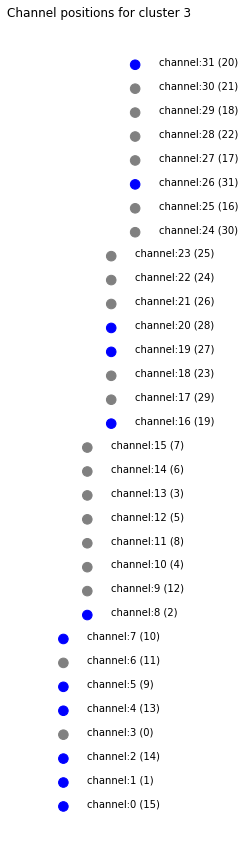

In [17]:
fig, ax = plt.subplots(figsize=(9,12))

for channel, position in zip(range(ses.wv_channels), ses.channel_positions):        
    color = 'blue' if channel in channels else 'gray'
    
    circle = plt.Circle((position[0], position[1]), 0.2, color=color)
    ax.add_patch(circle)
    
    plt.text(x=position[0]+1, y=position[1], s="channel:"+str(channel)+" ("+str(ses.channel_map[channel])+")")
    
ax.axis('off')
ax.axis('scaled') #this line fits your images to screen 
#ax.autoscale(enable=True) 
plt.title("Channel positions for cluster "+str(cluster))
plt.tight_layout()
plt.show()

Reduce this to shanks (multiple channels are on one shank), and multiple shanks are in one brain region.
One neuron shall be unambigously defined on only one brain region. 

In [18]:
print("Shanks:", ses.shanks_all)

Shanks: [0 1 2 3]


In [19]:
shanks_arr, active_shanks, electrodes = ses.get_active_shanks(channels)

In [20]:
if len(electrodes)!=1:
    print("Error, neuron was active on channels that belong to different brain regions!")

shank 0 (pos) is active
shank 1 (pos) is active
shank 2 (pos) is active
shank 3 (pos) is active


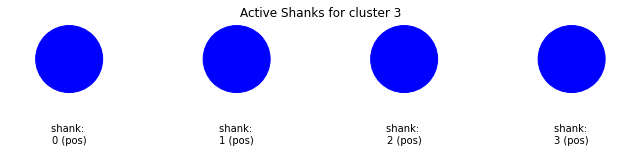

Brain region for neuron 3 is pos


In [21]:
fig, ax = plt.subplots(figsize=(9,3))

for i, (shank, active, el) in enumerate(zip(ses.shanks_all, shanks_arr, ses.desel)):
    print("shank",str(int(shank)),"("+el+")","is","active" if active else "not detecting this neuron")
    
    color = 'blue' if active else 'gray'
    
    circle = plt.Circle((i,0), 0.2, color=color)
    ax.add_patch(circle)
    
    plt.text(x=i, y=-.5, s="shank: \n"+str(int(shank))+" ("+el+")", ha='center')

ax.axis('off')
ax.axis('scaled') #this line fits your images to screen 
ax.autoscale(enable=True) 
plt.title("Active Shanks for cluster "+str(cluster))
plt.tight_layout()
plt.show()

print("Brain region for neuron",cluster,"is",electrodes[0])

### Decompose Cluster into Templates

The post-processing of phy might have changed (by split/merge) the clusters (initially equal to templates). Because we are interested in the clusters (= a neuon), we need to decompose the clusters into templates.
- [Phy spike_templates / spike_clusters](https://phy.readthedocs.io/en/latest/sorting_user_guide/#concepts)
- [Phy terminology - Clusters/Templates](https://github.com/cortex-lab/phy/blob/master/docs/terminology.md#cluster)

In [22]:
print("all clusters:", len(ses.clusterids))
print(ses.clusterids)

all clusters: 38
[ 2  3  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 27 28 29
 34 35 36 39 42 43 44 45 48 53 54 55 56 57]


In [23]:
good_clusters = [ int(n.name) for n in cg.neuron_list ] # = stl.clu_ids
print("good_clusters:", len(good_clusters))

good_clusters: 17


* Cluster 2


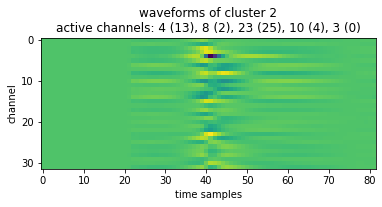

good one: False
decomposed template weights: {2: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 3


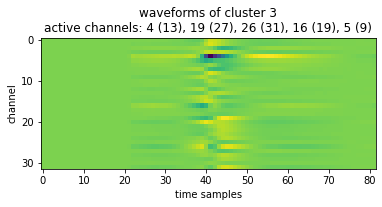

good one: True
decomposed template weights: {3: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 6


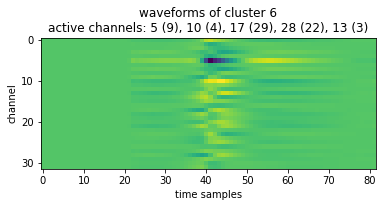

good one: False
decomposed template weights: {6: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 7


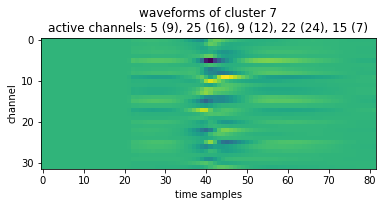

good one: False
decomposed template weights: {7: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 8


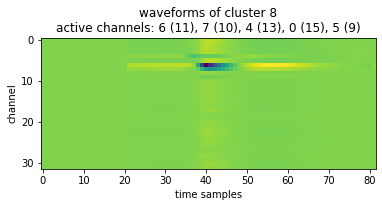

good one: True
decomposed template weights: {8: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 9


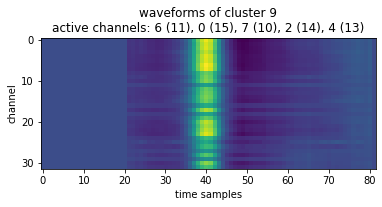

good one: False
decomposed template weights: {9: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 10


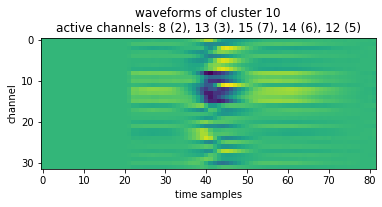

good one: False
decomposed template weights: {10: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 11


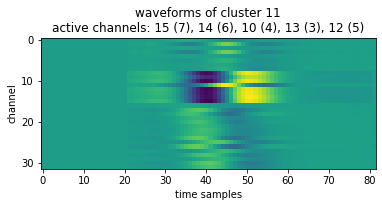

good one: False
decomposed template weights: {11: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 12


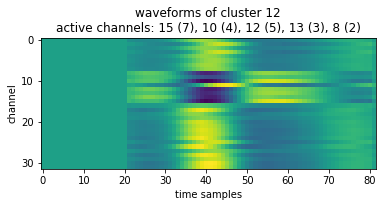

good one: False
decomposed template weights: {12: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 13


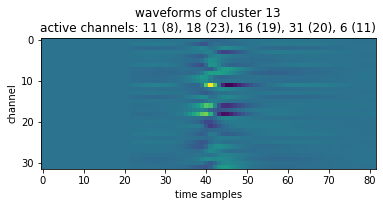

good one: False
decomposed template weights: {13: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 14


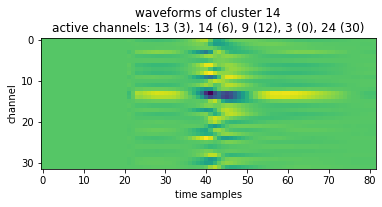

good one: False
decomposed template weights: {14: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 15


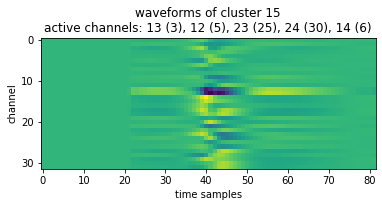

good one: False
decomposed template weights: {15: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 16


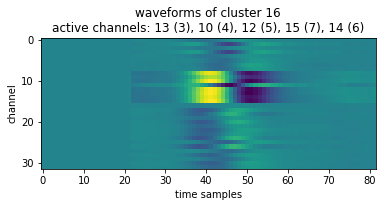

good one: False
decomposed template weights: {16: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 17


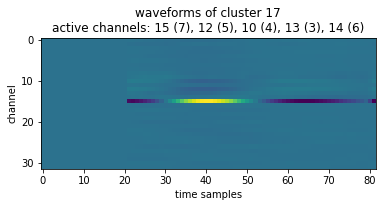

good one: False
decomposed template weights: {17: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 18


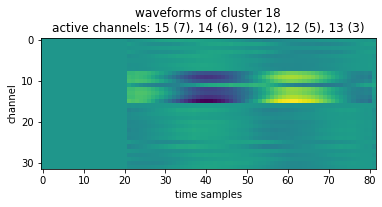

good one: False
decomposed template weights: {18: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 19


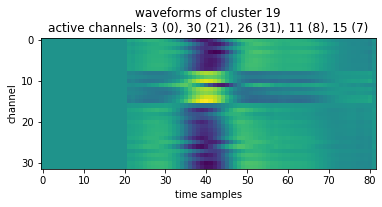

good one: False
decomposed template weights: {19: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 20


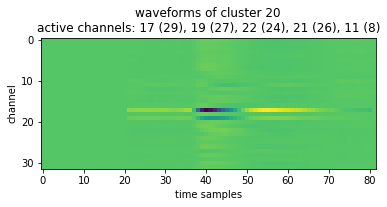

good one: True
decomposed template weights: {20: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 21


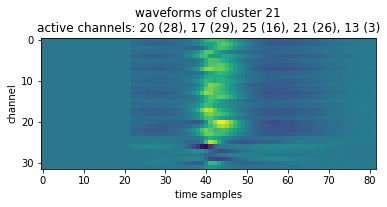

good one: False
decomposed template weights: {21: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 22


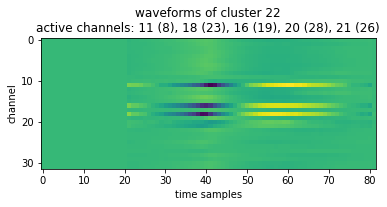

good one: False
decomposed template weights: {22: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 23


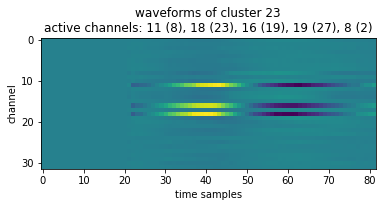

good one: False
decomposed template weights: {23: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 24


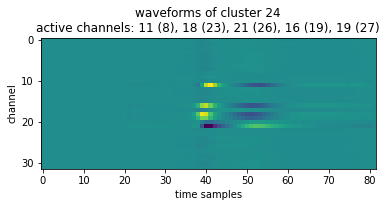

good one: False
decomposed template weights: {24: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 27


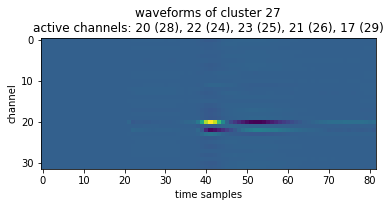

good one: False
decomposed template weights: {27: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 28


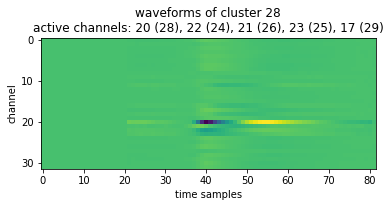

good one: True
decomposed template weights: {28: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 29


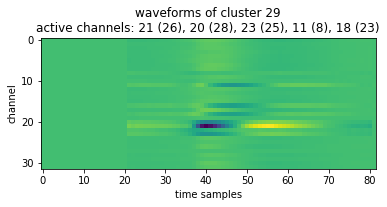

good one: False
decomposed template weights: {29: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 34


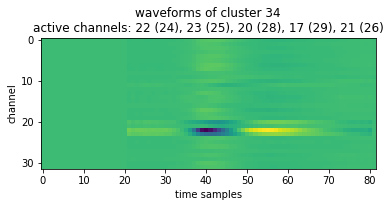

good one: True
decomposed template weights: {34: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 35


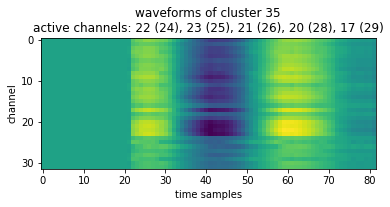

good one: False
decomposed template weights: {35: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 36


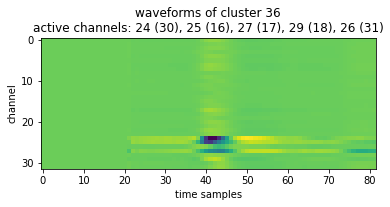

good one: True
decomposed template weights: {36: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 39


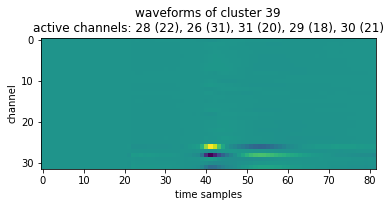

good one: True
decomposed template weights: {39: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 42


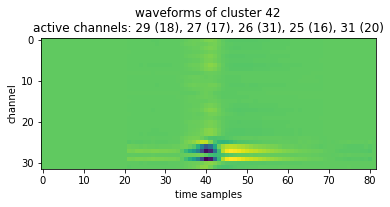

good one: True
decomposed template weights: {42: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 43


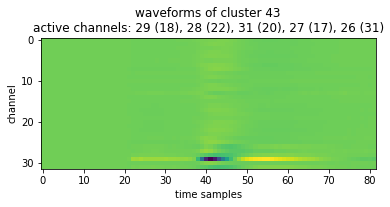

good one: True
decomposed template weights: {43: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 44


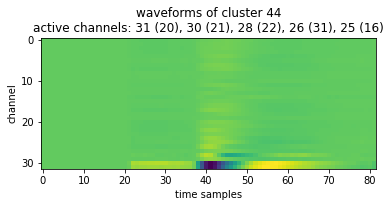

good one: True
decomposed template weights: {44: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 45


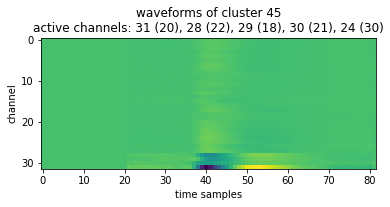

good one: True
decomposed template weights: {45: 1.0}
cluster is from only one template (no merge)
cluster coincides with template (no split)
-----------------------

* Cluster 48


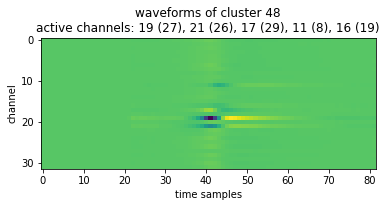

good one: True
decomposed template weights: {25: 0.9325345001682935, 26: 0.0674654998317065}
cluster is from merged templates:
- template 25


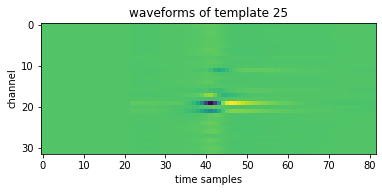

- template 26


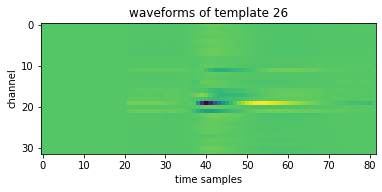

-----------------------

* Cluster 53


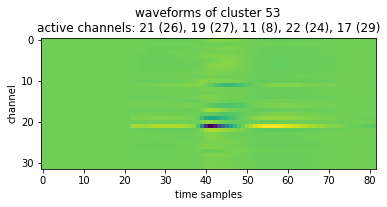

good one: True
decomposed template weights: {30: 0.014387144992526158, 31: 0.020366218236173392, 32: 0.043535127055306426, 33: 0.8684603886397608, 47: 0.053251121076233185}
cluster is from merged templates:
- template 30


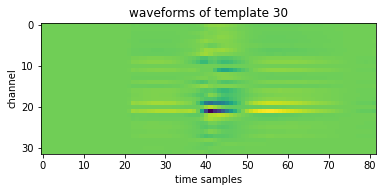

- template 31


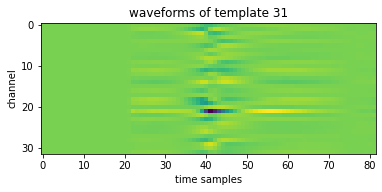

- template 32


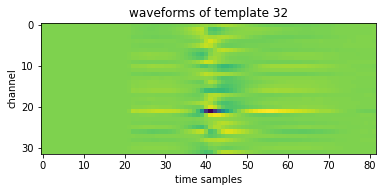

- template 33


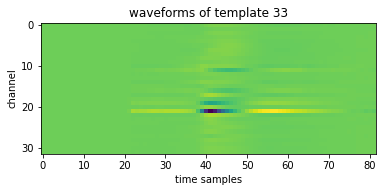

- template 47


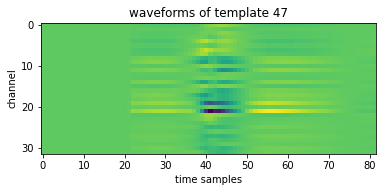

-----------------------

* Cluster 54


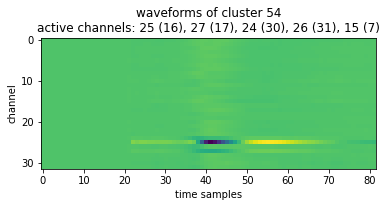

good one: True
decomposed template weights: {37: 0.04508895929807458, 38: 0.9549110407019255}
cluster is from merged templates:
- template 37


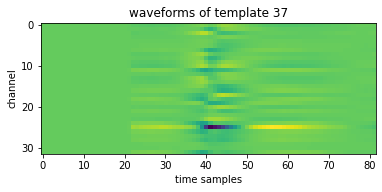

- template 38


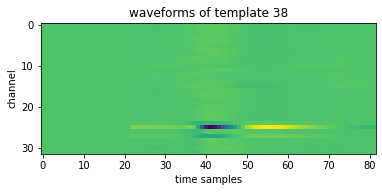

-----------------------

* Cluster 55


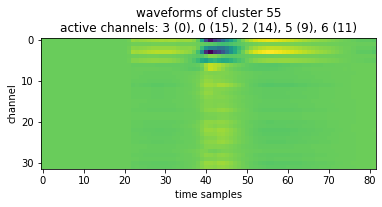

good one: True
decomposed template weights: {1: 0.9380320890635232, 46: 0.06196791093647675}
cluster is from merged templates:
- template 1


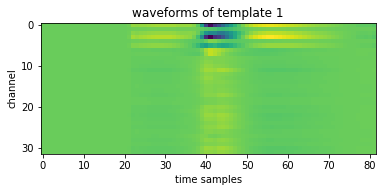

- template 46


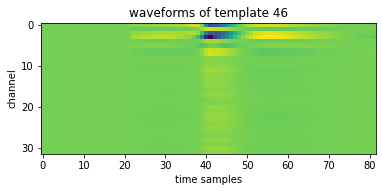

-----------------------

* Cluster 56


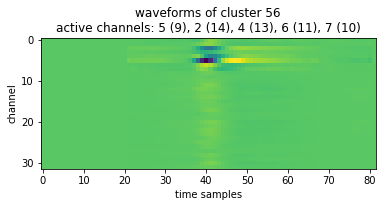

good one: True
decomposed template weights: {0: 0.08825099585232639, 4: 0.9000041066075315, 5: 0.011744897540142088}
cluster is from merged templates:
- template 0


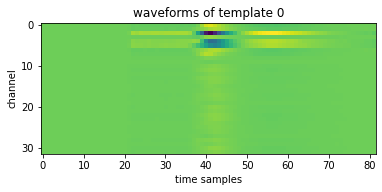

- template 4


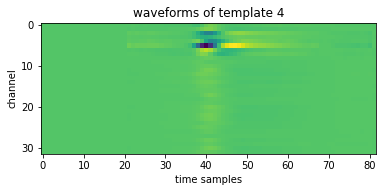

- template 5


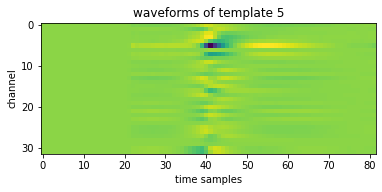

-----------------------

* Cluster 57


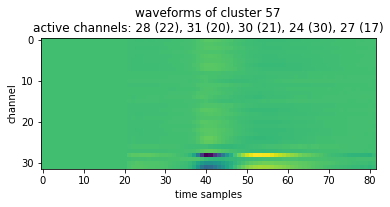

good one: True
decomposed template weights: {40: 0.7203061422204999, 41: 0.2796938577795001}
cluster is from merged templates:
- template 40


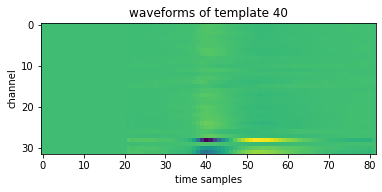

- template 41


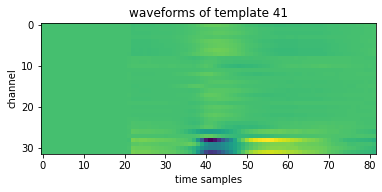

-----------------------



In [24]:
for c in ses.clusterids:
    print("* Cluster",c)
    
    cluster_waveforms = ses.get_waveforms_from_cluster(c)
    high_channels = ses.get_channels_from_waveforms(cluster_waveforms) # waveform by cluster
    plt.imshow(cluster_waveforms.T)
    plt.xlabel("time samples")
    plt.ylabel("channel")
    plt.title("waveforms of cluster "+str(c)+"\n"+"active channels: "+', '.join([str(ch)+" ("+str(ses.channel_map[ch])+")" for ch in high_channels]))
    plt.show()
    
    print("good one:",c in good_clusters)
    
    unique, weights = ses.decompose_cluster(c)
    print("decomposed template weights:",dict(zip(unique, weights)))
    if len(unique)==1:
        print("cluster is from only one template (no merge)")
        if unique[0]==c:
            print("cluster coincides with template (no split)")
        else:
            print("cluster is from split template")
    else:
        print("cluster is from merged templates:")
        for t in unique:
            print("- template",t)
            template_waveforms = ses.get_waveforms(t) # waveform by template
            plt.imshow(template_waveforms.T)
            plt.title("waveforms of template "+str(t))
            plt.xlabel("time samples")
            plt.ylabel("channel")
            plt.show()
    
    print("-----------------------")
    print("")